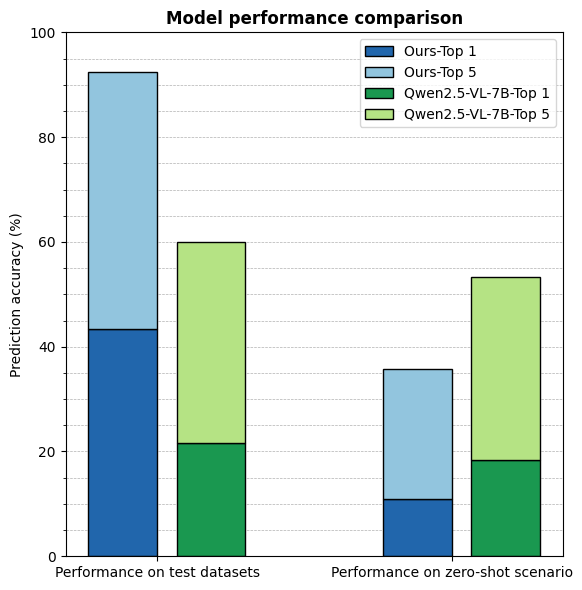

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
labels = ['Performance on test datasets', 'Performance on zero-shot scenario']
x = np.arange(len(labels)) * 0.3  # 缩小横坐标之间的距离
width = 0.07  # 更细的柱状图宽度
spacing = 0.02  # 模型柱子之间的间隔

# 各个模型的准确率数据
ours_top1 = [43.46, 10.98]
ours_top5 = [92.37, 35.82]
qwen_top1 = [21.58, 18.33]
qwen_top5 = [60.04, 53.36]

# 创建图形和子图
fig, ax = plt.subplots(figsize=(6, 6))

# 使用原图颜色
colors = {
    'ours_top1': '#2166ac',
    'ours_top5': '#92c5de',
    'qwen_top1': '#1a9850',
    'qwen_top5': '#b5e384',
}

# 计算带间距的位置
bar1 = x - width / 2  # 调整位置以使标签居中于两组柱子
bar2 = x + width / 2 + spacing

# 绘制每组的叠加柱状图，含黑色描边
ax.bar(bar1, ours_top1, width, label='Ours-Top 1', color=colors['ours_top1'], edgecolor='black')
ax.bar(bar1, [ours_top5[i] - ours_top1[i] for i in range(len(ours_top1))], width, bottom=ours_top1, label='Ours-Top 5', color=colors['ours_top5'], edgecolor='black')

ax.bar(bar2, qwen_top1, width, label='Qwen2.5-VL-7B-Top 1', color=colors['qwen_top1'], edgecolor='black')
ax.bar(bar2, [qwen_top5[i] - qwen_top1[i] for i in range(len(qwen_top1))], width, bottom=qwen_top1, label='Qwen2.5-VL-7B-Top 5', color=colors['qwen_top5'], edgecolor='black')

# 添加标签和标题
ax.set_ylabel('Prediction accuracy (%)')
ax.set_title('Model performance comparison', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 100)
ax.legend()

# 添加纵坐标虚线和刻度设置
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# 显示图形
plt.tight_layout()
plt.show()


## 训练绘图

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
from IPython import display
# 定义 use_svg_display 函数
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

# 定义 set_axes 函数
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置 Matplotlib 的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
 

class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 3.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        use_svg_display()   
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()

    def show(self):
        display.display(self.fig)# 输出图像
        display.clear_output(wait=True)# 不输出新图像，而是覆盖之前的图像

In [ ]:
""" 
# 创建动漫实例
animator = Animator(xlabel='X 轴', ylabel='Y 轴', legend=['first', 'second'],
                    xlim=(0, 10), ylim=(-1, 2), xscale='linear', yscale='linear',
                    fmts=['r-', 'b--'])

# 生成数据
x = np.linspace(0, 10, 100)

# 逐点绘制两条曲线
for i in range(len(x)):
    # 曲线1: y1 = sin(x)
    y1 = np.sin(x[i])
    # 曲线2: y2 = cos(x)
    y2 = np.cos(x[i])
    animator.add(x[i], [y1, y2])
    display.clear_output(wait=True)  # 清除之前的输出
"""

In [ ]:
# 初始化画图
animator = Animator(xlabel='epoch', xlim=[1, epochs], ylim=[0.3, 1.6],
                            legend=['train_loss', 'train_acc','val_loss', 'val_acc'])


 # 绘图
animator.add(epoch + 1, [train_loss / len(train_loader), train_acc / len(train_set),val_loss / len(val_loader), val_acc / len(val_set)])
        